In [1]:
import numpy as np
import xarray as xr 

import matplotlib.pylab as plt
from matplotlib.colors import BoundaryNorm
import glidertools as gt

from cmocean import cm as cmo

import gsw

In [11]:
data_dir = '/Users/dhruvbalwada/OneDrive/sogos_data'
data_659 = data_dir+'/data/interim/gliders/sg659_20201010/CTD_659.nc'
data_660 = data_dir+'/data/interim/gliders/sg660_20201010/CTD_660.nc'

ds_659_new = xr.load_dataset(data_659)
ds_660_new = xr.load_dataset(data_660)

In [12]:
data_dir = '/Users/dhruvbalwada/OneDrive/sogos_data'
data_659 = data_dir+'/data/interim/gliders/sg659_20200413/CTD_659.nc'
data_660 = data_dir+'/data/interim/gliders/sg660_20200413/CTD_660.nc'

ds_659_old = xr.load_dataset(data_659)
ds_660_old = xr.load_dataset(data_660)

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/glidertools/plot.py:151: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, rasterized=True, **kwargs)


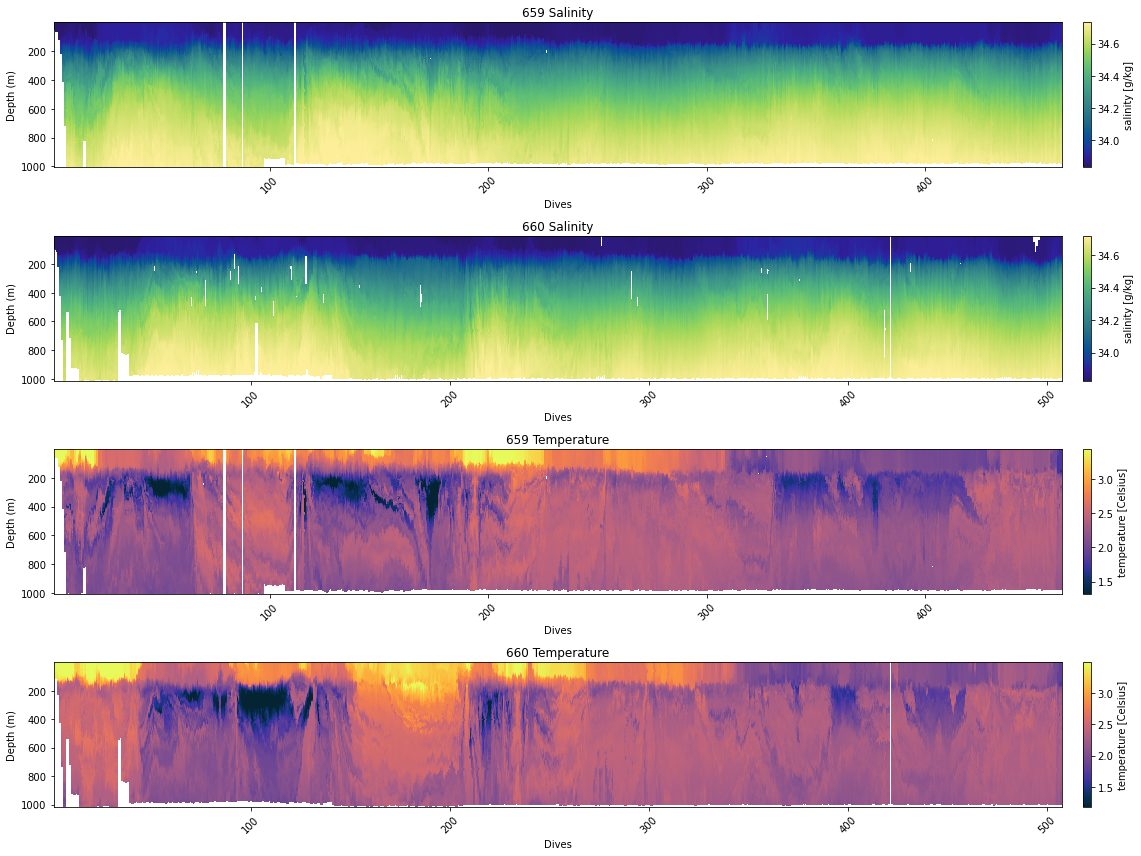

In [34]:
fig, ax = plt.subplots(4,1, figsize=(16, 12))

gt.plot(ds_659_old.dives, ds_659_old.pressure, ds_659_old.salinity, cmap = cmo.haline, robust=True, ax = ax[0])
ax[0].set_title('659 Salinity')

gt.plot(ds_660_old.dives, ds_660_old.pressure, ds_660_old.salinity, cmap = cmo.haline, robust=True, ax = ax[1])
ax[1].set_title('660 Salinity')

gt.plot(ds_659_old.dives, ds_659_old.pressure, ds_659_old.temperature, cmap = cmo.thermal, robust=True, ax = ax[2])
ax[2].set_title('659 Temperature')

gt.plot(ds_660_old.dives, ds_660_old.pressure, ds_660_old.temperature, cmap = cmo.thermal, robust=True, ax = ax[3])
ax[3].set_title('660 Temperature')

plt.tight_layout()

plt.savefig('20200413_TS_glders.pdf')

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/glidertools/plot.py:151: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, rasterized=True, **kwargs)


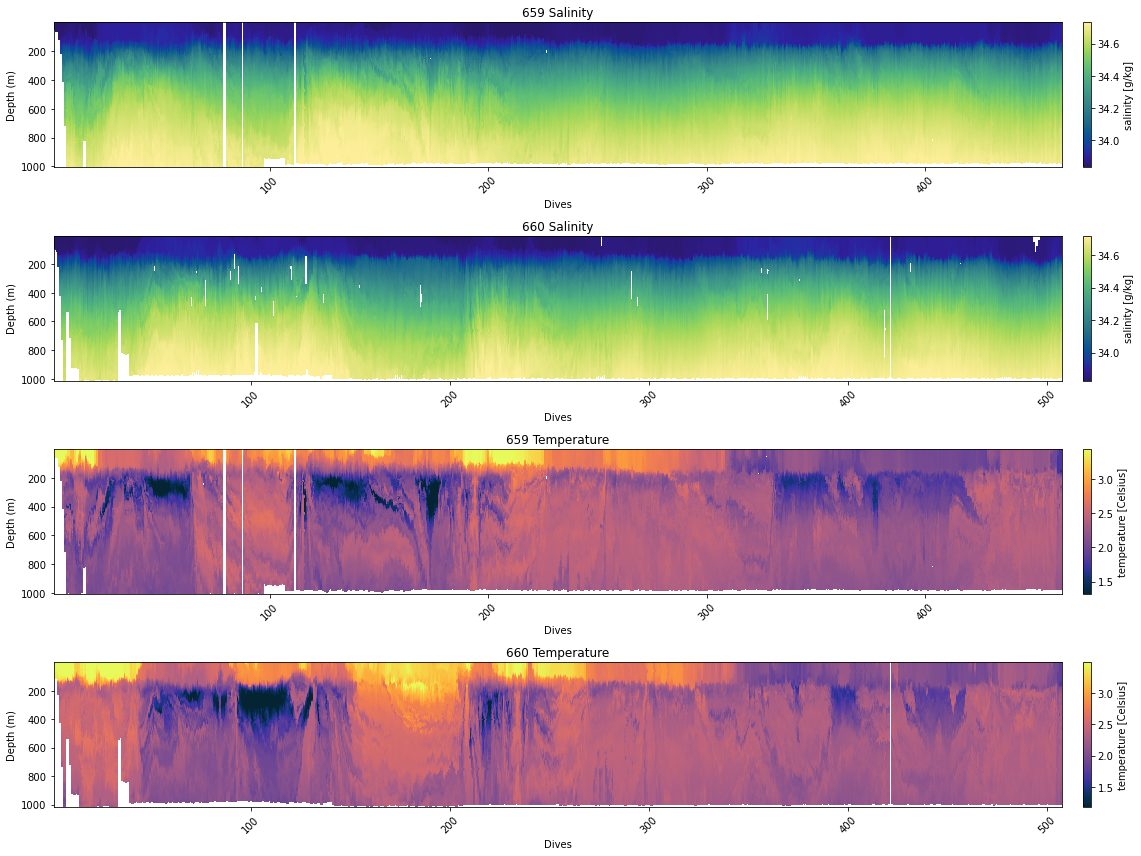

In [33]:
fig, ax = plt.subplots(4,1, figsize=(16, 12))

gt.plot(ds_659_new.dives, ds_659_new.pressure, ds_659_new.salinity, cmap = cmo.haline, robust=True, ax = ax[0])
ax[0].set_title('659 Salinity')

gt.plot(ds_660_new.dives, ds_660_new.pressure, ds_660_new.salinity, cmap = cmo.haline, robust=True, ax = ax[1])
ax[1].set_title('660 Salinity')

gt.plot(ds_659_new.dives, ds_659_new.pressure, ds_659_new.temperature, cmap = cmo.thermal, robust=True, ax = ax[2])
ax[2].set_title('659 Temperature')

gt.plot(ds_660_new.dives, ds_660_new.pressure, ds_660_new.temperature, cmap = cmo.thermal, robust=True, ax = ax[3])
ax[3].set_title('660 Temperature')

plt.tight_layout()

plt.savefig('TS_glders.pdf')

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/glidertools/plot.py:151: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, rasterized=True, **kwargs)


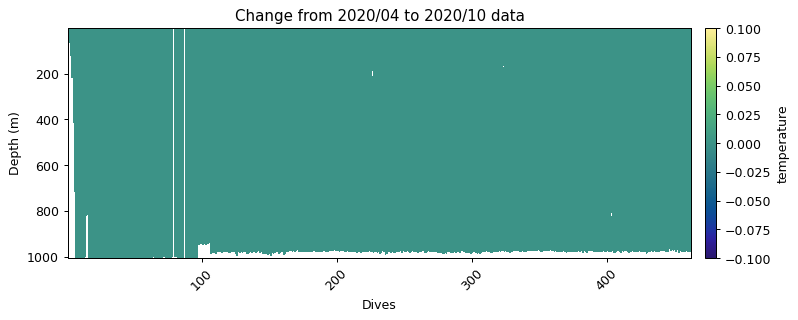

In [50]:
dives = ds_659_old.dives
depth = ds_659_old.pressure
temp = ds_659_old.temperature  - ds_659_new.temperature


gt.plot(dives, depth, temp, cmap=cmo.haline, robust=True)
#plt.xlim(50, 150)
plt.title('Change from 2020/04 to 2020/10 data')
plt.show()


In [57]:
print(np.abs(ds_659_old.temperature  - ds_659_new.temperature).mean().values)
print(np.abs(ds_660_old.temperature  - ds_660_new.temperature).mean().values)
print(np.abs(ds_659_old.salinity  - ds_659_new.salinity).mean().values)
print(np.abs(ds_660_old.salinity  - ds_660_new.salinity).mean().values)
print('This shows that nothing about the data has changed.')

0.0
0.0
0.0
0.0
This shows that nothing about the data has changed.


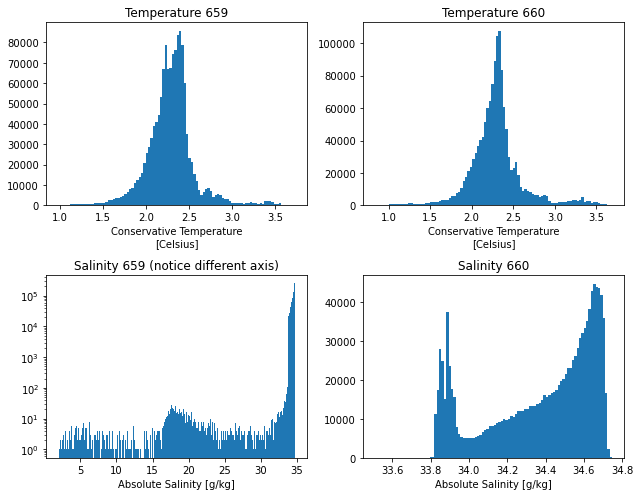

In [45]:
plt.figure(figsize=(9,7))

plt.subplot(221)
ds_659_new.temperature.plot.hist(bins=100);
plt.title('Temperature 659')

plt.subplot(222)
ds_660_new.temperature.plot.hist(bins=100);
plt.title('Temperature 660')


plt.subplot(223)
ds_659_new.salinity.plot.hist(bins=500);
plt.yscale('log')
plt.title('Salinity 659 (notice different axis)')

plt.subplot(224)
ds_660_new.salinity.plot.hist(bins=100);
plt.title('Salinity 660')

plt.tight_layout()

plt.savefig('20201010_TS_pdfs.pdf')

In [ ]:
## How a sigma correction might go 
